In [1]:
# Task 1: Dataset Exploration
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target
print("Dataset Description:\n", diabetes.DESCR)
print("\nFeature Names:\n", diabetes.feature_names)
print("\nFirst 5 rows of the dataset:\n", X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())
print(df.describe())

# Summary statistics
print("\nSummary Statistics:")

# Spliting the dataset (80-20)
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Dataset Description:
 .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feat

In [3]:
# Task 2: Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Training the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluating with R^2 score
y_pred = lr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R² Score on Test Set: {r2:.4f}")

R² Score on Test Set: 0.4526


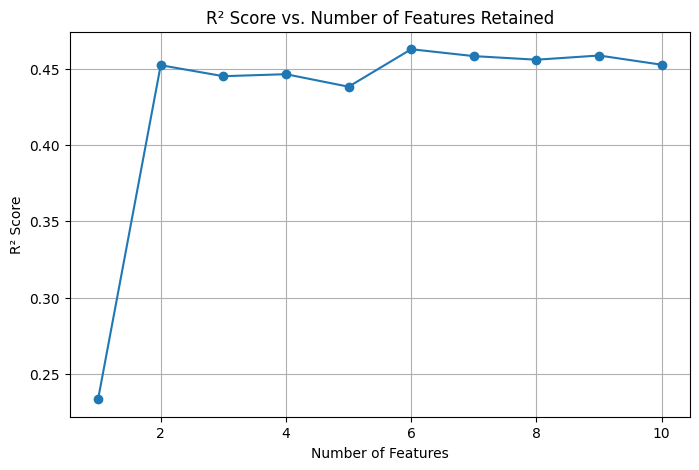

Optimal Number of Features: 2
Selected Features: ['bmi', 's5']


In [27]:
# Task 3: Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np

r2_scores = []
feature_counts = range(1, 11)

for n_features in feature_counts:
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    r2 = rfe.score(X_test, y_test)
    r2_scores.append(r2)

r2_improvements = np.diff(r2_scores)
optimal_features = 1  

for i, improvement in enumerate(r2_improvements):
    if improvement < 0.01:
        optimal_features = i + 1
        break
else:
    optimal_features = 10  

rfe_optimal = RFE(estimator=LinearRegression(), n_features_to_select=optimal_features)
rfe_optimal.fit(X_train, y_train)

# Visualization
plt.figure(figsize=(8, 5))
plt.plot(feature_counts, r2_scores, marker='o')
plt.xlabel("Number of Features")
plt.ylabel("R² Score")
plt.title("R² Score vs. Number of Features Retained")
plt.grid()
plt.show()

selected_features = X.columns[rfe_optimal.support_]
print(f"Optimal Number of Features: {optimal_features}")
print(f"Selected Features: {selected_features.tolist()}")

In [15]:
for n_features in range(1, 11):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    
    selected_features = X.columns[rfe.support_]
    coefs = pd.Series(rfe.estimator_.coef_, index=selected_features)
    feature_coefficients = pd.concat([feature_coefficients, coefs.rename(f'{n_features}_features')], axis=1)
    r2_scores_per_iteration.append(rfe.score(X_test, y_test))

feature_coefficients = feature_coefficients.T.fillna(0)
print("\nCoefficients at Each RFE Iteration:")
print(feature_coefficients)

rfe_full = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe_full.fit(X_train, y_train)

final_coefficients = pd.Series(rfe_full.estimator_.coef_, index=X.columns)
print("\nCoefficients for All Features (Final Iteration):")
print(final_coefficients)

top_features = final_coefficients.abs().sort_values(ascending=False).head(3)
print("\nTop 3 Most Important Features:")
print(top_features)

initial_ranking = pd.Series(rfe_full.ranking_, index=X.columns).sort_values()

print("\nInitial Feature Rankings (from RFE):")
print(initial_ranking)
optimal_features = 2
final_rfe = RFE(estimator=LinearRegression(), n_features_to_select=optimal_features)
final_rfe.fit(X_train, y_train)
selected_features_final = X.columns[final_rfe.support_]

print(f"\nFinal Selected Features: {selected_features_final.tolist()}")


Coefficients at Each RFE Iteration:
             1_features  2_features  3_features  4_features  5_features  \
bmi          998.577689  732.109021  737.685594  691.460102  597.892739   
s5             0.000000  562.226535  680.224653  783.168538  728.643647   
s1             0.000000    0.000000 -228.339889 -592.977874 -655.560612   
s2             0.000000    0.000000    0.000000  362.950323  409.622184   
bp             0.000000    0.000000    0.000000    0.000000  306.647913   
sex            0.000000    0.000000    0.000000    0.000000    0.000000   
s4             0.000000    0.000000    0.000000    0.000000    0.000000   
s3             0.000000    0.000000    0.000000    0.000000    0.000000   
s6             0.000000    0.000000    0.000000    0.000000    0.000000   
age            0.000000    0.000000    0.000000    0.000000    0.000000   
1_features     0.000000    0.000000    0.000000    0.000000    0.000000   
2_features     0.000000    0.000000    0.000000    0.000000    

1)Recursive Feature Elimination (RFE) helps identify the most important features by iteratively removing the least significant ones.
    
2)It improves model performance by reducing overfitting and simplifying the model.

3)The process is based on feature importance derived from the estimator’s coefficients (for linear models).

4)RFE helps visualize how model performance (R² score) changes with different numbers of features.

5)It can be computationally intensive for large datasets, but it provides a clear ranking of feature importance.

RFE:

Works by recursively eliminating features based on model coefficients.
It requires multiple model fittings, which can be time-consuming.
Provides a clear ranking of features through elimination steps.
    
LASSO (Least Absolute Shrinkage and Selection Operator):

Performs feature selection by adding an L1 penalty to the regression, shrinking some coefficients to exactly zero.
More efficient for large datasets as it selects features in a single model fitting.
Can struggle with correlated features, arbitrarily selecting one over the other.
Comparison:

RFE is flexible and can be used with various models, while LASSO is specific to linear models with regularization.
LASSO is faster but less interpretable compared to RFE’s iterative process.

Top Features Identified: s1, s5, and bmi are the most important predictors of diabetes progression.

Significance:

s1 (likely related to blood serum measurements) and s5 (linked to blood sugar levels) show strong relationships with diabetes severity.
    
bmi (Body Mass Index) indicates the critical role of obesity in diabetes progression.
    
The selection of these features highlights the influence of metabolic health and body composition on diabetes.
Removing less important features didn’t significantly decrease model performance, indicating redundancy in some variables.